#Problem Statement
Many companies create accounts on social media platforms to bring awareness to their brands and promote their products and services. PeaCh, a natural skincare company, has decided to increase its online presence, starting with X, previously known as twitter. Since they started their operation in 2021, they have focused most of their online advetisements to instagram which mainly reaches a particular segment of customers availabe in their region, Kuwait. Deciding to broaden their customer base to reach and attract more customers, I have been hired to perform a sentiment analysis to see how other companies are perceived on this platform. I'll be using the twitter dataset provided by them. This dataset includes the list of companies, the sentiments(irrelevant, neutral, positive and negative) and the tweet relating to them.
They want me to find soloutions to the following issues specified by them:
1. Find users interested in natural skincare products
2. Suggests ways to use X to generate more sales to their website
3. Increase international customer base

By analysing the data provided by them, I'll be using classification models to help find possible solutions to the stated problems.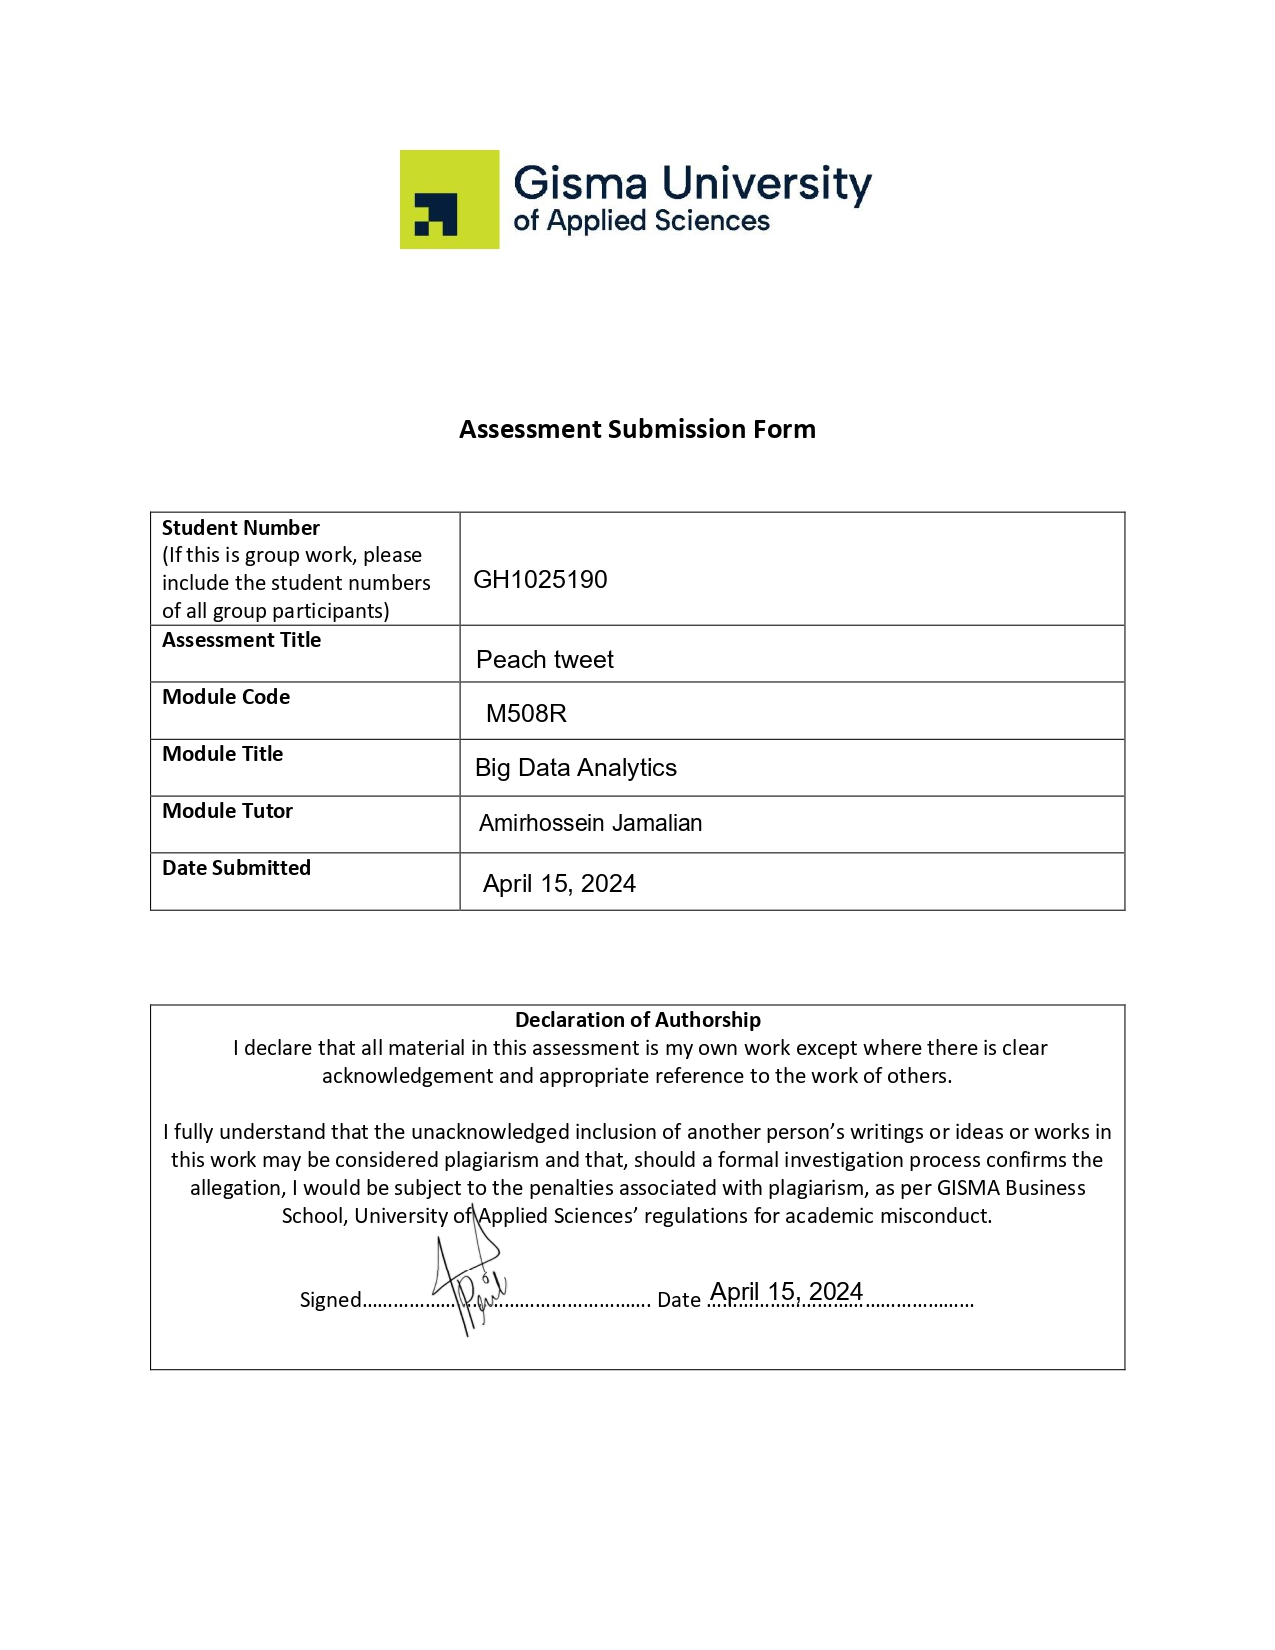

The source for the dataset is linked below:
 https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

*The data set didn't come with columns so I created a list and attched it while trying to read the csv file

In [3]:
cols = ['ID', 'Entity', 'Sentiment', 'Tweet Content']
df = pd.read_csv('dataset.csv', encoding = 'latin-1', names = cols)
df.head()

,ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


#Data Exploration
The datasets originally had 74,682 rows with four columns but I reduced it to 7000 to shorten the run time. With the shape function, I checked the current size of the dataset which is 7000 rows and 4 columns. Since the focus of this pipeine is the sentiment, I decided to visulaise the sentiment to see if they were balanced but it wasn't, so I used the lambda function to balance it. Doing this changed the size of the dataset which can be seen when I checked the shape after balancing them to make them equal.

I checked for null values with the .isnull() and counted them with the .sum() I also used  dropna rows with null values, which further reduced the size of the dataset.

In [4]:
df.shape

(7000, 4)

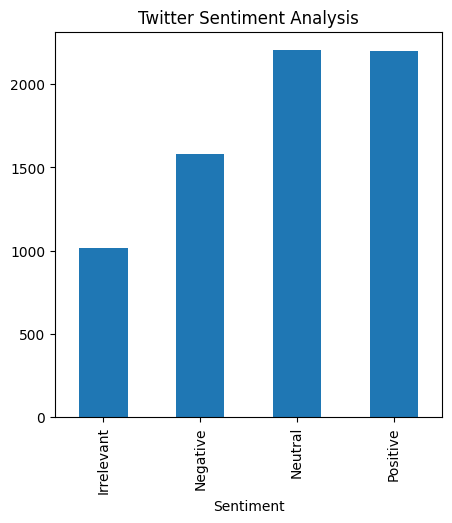

In [5]:
#visualising the sentiment to check if they are balanced
ax = df['Sentiment'].value_counts().sort_index() \
        .plot(kind='bar',
              title = 'Twitter Sentiment Analysis',
              figsize=(5,5))
ax.set_xlabel('Sentiment')
plt.show()

#Note: imbalanced

In [6]:
#using lambda to balance the sentiments
df = df.groupby('Sentiment').apply(lambda x: x.sample(df['Sentiment'].value_counts().min()))

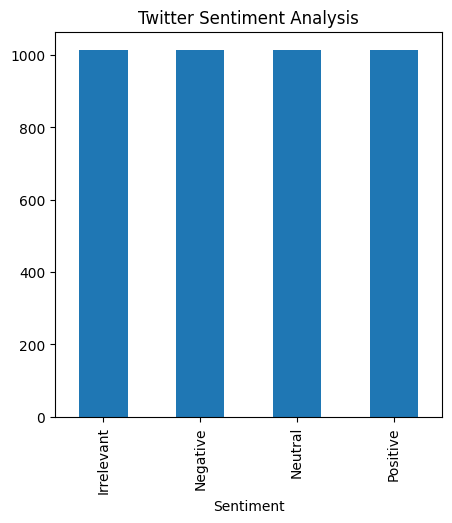

In [7]:
ax = df['Sentiment'].value_counts().sort_index() \
        .plot(kind='bar',
              title = 'Twitter Sentiment Analysis',
              figsize=(5,5))
ax.set_xlabel('Sentiment')
plt.show()


In [8]:
df.shape

(4056, 4)

In [9]:
#checking for null values
df.isnull().sum()

ID                0
Entity            0
Sentiment         0
Tweet Content    49
dtype: int64

In [10]:
df=df.dropna(how='any', axis=0)
df.head()

ID                     Entity   Sentiment  \
Sentiment                                                      
Irrelevant 386   2465                Borderlands  Irrelevant   
           1744  2706                Borderlands  Irrelevant   
           4535  1979  CallOfDutyBlackopsColdWar  Irrelevant   
           3686  1837  CallOfDutyBlackopsColdWar  Irrelevant   
           1078  2590                Borderlands  Irrelevant   

                                                     Tweet Content  
Sentiment                                                           
Irrelevant 386   Pretty Happy with this! I made these subbids f...  
           1744  IN ALGERIA : women movement ?? s involvement ...  
           4535  youtu.be/FH3Bw3stZ8k found my new movie vid it...  
           3686   Gianluigi Buffon looks on with joy at this fella  
           1078  by Beautiful morning in the Lancashire/Cheshir...

In [11]:
df.isnull().sum()

ID               0
Entity           0
Sentiment        0
Tweet Content    0
dtype: int64

#Data Processing

I imported the following from the nltk library: stopwords, porter stemmer and RegexpTokenizer(r"\w+"). Along with the re and functools library to use the reduce function.

The stopwords allows me to remove unnecessary words such as 'the', 'a', 'an' etc. They don't provide any useful insight into the data. Porter stemmer sets the word to their root/base word. And RegexpTokenizer removes all the non-english characters.

I used the re library to call on the lambda function so that I can remove all the numerical values from the Tweet content.

All of this was done to process the text to make it ready for vectorization. This was initially tested on a single text then applied to all the text in the column Tweet content.

I also used the label encoder to convert the text in the sentiment column from a categorical variable to
numerical. Since the new columns (New Sentiment and New Tweet Content) were created, I considered dropping the previous ones, but seeing as I wouldn't be using them it made no difference, so I decided to leave them as they were and just focus on the columns I needed.

In [12]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from functools import reduce
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
#Viewing tweet
tweet = df['Tweet Content'][20]
print('The Tweet:')
print(tweet)
print()

The Tweet:
Black Ops Global War cutscene leak:.. Afghanistan, 1989, a cave.. Jordan: But Sheik, because we have the devil??s weapons, are we not devils ourselves?.. Osama Abu Laden: Sometimes, to fight one evil, you must work with another evil. You are a terrible man, Abdul, who must do bad evil.



In [14]:
#for ine tweet
tweet = df['Tweet Content'][20]
print('The Tweet:')
print(tweet)
print("="*100)
print()

#instance for removing number
num = lambda tweet: re.sub(r'\d+', " ", tweet)

#tokenizing: removing non english characters
token = nltk.RegexpTokenizer(r"\w+")
tweet1  = token.tokenize(tweet)

num1 = [num(token) for token in tweet1]

#removing stop words
stop = set(stopwords.words('english'))
new_tweet = [w for w in num1 if not w.lower() in stop]

#stemming
ps = PorterStemmer()
stemmer = reduce(lambda x, y: x + " " + ps.stem(y), new_tweet)

print('Pre-processed tweet:')
print(stemmer)

The Tweet:
Black Ops Global War cutscene leak:.. Afghanistan, 1989, a cave.. Jordan: But Sheik, because we have the devil??s weapons, are we not devils ourselves?.. Osama Abu Laden: Sometimes, to fight one evil, you must work with another evil. You are a terrible man, Abdul, who must do bad evil.

Pre-processed tweet:
Black op global war cutscen leak afghanistan   cave jordan sheik devil weapon devil osama abu laden sometim fight one evil must work anoth evil terribl man abdul must bad evil


In [15]:
#applying pre_processing to the whole dataset

def preprocessing(tweet):

  num = lambda tweet: re.sub(r'\d+', " ", tweet)

  token = nltk.RegexpTokenizer(r"\w+")
  tweet1  = token.tokenize(tweet)
  num1 = [num(token) for token in tweet1]

  stop = set(stopwords.words('english'))
  new_tweet = [w for w in num1 if not w.lower() in stop]

  #stemming
  ps = PorterStemmer()
  stemmed = ' '.join([ps.stem(w) for w in new_tweet])

  return stemmed

df['New Tweet Content']  = df['Tweet Content'].apply(preprocessing)

df.head()

ID                     Entity   Sentiment  \
Sentiment                                                      
Irrelevant 386   2465                Borderlands  Irrelevant   
           1744  2706                Borderlands  Irrelevant   
           4535  1979  CallOfDutyBlackopsColdWar  Irrelevant   
           3686  1837  CallOfDutyBlackopsColdWar  Irrelevant   
           1078  2590                Borderlands  Irrelevant   

                                                     Tweet Content  \
Sentiment                                                            
Irrelevant 386   Pretty Happy with this! I made these subbids f...   
           1744  IN ALGERIA : women movement ?? s involvement ...   
           4535  youtu.be/FH3Bw3stZ8k found my new movie vid it...   
           3686   Gianluigi Buffon looks on with joy at this fella   
           1078  by Beautiful morning in the Lancashire/Cheshir...   

                                                 New Tweet Content  
Sentiment                                                           
Irrelevant 386   pretti happi made subbid friend  egam human ri...  
           1744         algeria women movement involv cross border  
           4535  youtu fh bw stz k found new movi vid show vari...  
           3686                    gianluigi buffon look joy fella  
           1078  beauti morn lancashir cheshir borderland yoga ...

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
df['New Sentiment'] = le.fit_transform(df['Sentiment'])
df.head()

ID                     Entity   Sentiment  \
Sentiment                                                      
Irrelevant 386   2465                Borderlands  Irrelevant   
           1744  2706                Borderlands  Irrelevant   
           4535  1979  CallOfDutyBlackopsColdWar  Irrelevant   
           3686  1837  CallOfDutyBlackopsColdWar  Irrelevant   
           1078  2590                Borderlands  Irrelevant   

                                                     Tweet Content  \
Sentiment                                                            
Irrelevant 386   Pretty Happy with this! I made these subbids f...   
           1744  IN ALGERIA : women movement ?? s involvement ...   
           4535  youtu.be/FH3Bw3stZ8k found my new movie vid it...   
           3686   Gianluigi Buffon looks on with joy at this fella   
           1078  by Beautiful morning in the Lancashire/Cheshir...   

                                                 New Tweet Content  \
Sentiment                                                            
Irrelevant 386   pretti happi made subbid friend  egam human ri...   
           1744         algeria women movement involv cross border   
           4535  youtu fh bw stz k found new movi vid show vari...   
           3686                    gianluigi buffon look joy fella   
           1078  beauti morn lancashir cheshir borderland yoga ...   

                 New Sentiment  
Sentiment                       
Irrelevant 386               0  
           1744              0  
           4535              0  
           3686              0  
           1078              0

In [18]:
df.value_counts('New Sentiment')

New Sentiment
3    1006
1    1004
0    1001
2     996
Name: count, dtype: int64

#Splitting Dataset

With train test split, I divided the dataset into training and test dataset. I also created a validation dataset to use from comparison before testing on the test dataset.

I used the TfidfVectorizer to convert the text column, New Tweet Content, from text to nurerical which can be understood by the model. I fit_transform to the X_train_df, but only transfored the X_valid_df and X_test_df since what was learned from the fitting would be used to transform the rest.

The .toarray() was used because I kept getting the following error message: *"TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array."*

Once this was done, the data was ready for training on the model.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
X = df['New Tweet Content']
y = df['New Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20 )
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.20 )

In [21]:
#vectorizing
vectorize = TfidfVectorizer(min_df =2)
X_train_df = vectorize.fit_transform(X_train).toarray()
X_valid_df = vectorize.transform(X_valid).toarray()
X_test_df = vectorize.transform(X_test).toarray()

In [22]:
print("X_train:", X_train_df.shape)
print("X_valid:", X_valid_df.shape)
print("X_train:", X_test_df.shape)

X_train: (2564, 2959)
X_valid: (641, 2959)
X_train: (802, 2959)


#Model
To train the dataset, I've decided to use the following models which work well with sentiment Analysis:
1. Naive Bayes
2. Logistic Regression
3. Random Forest
4. Decision Tree

I've also imported the classification report so I can check the and compare the F1, Precision and Recall along with the accuracy.

I started with the Naive Bayes. Once trained, I used the X_valid_df and y_valid to check if it made good prediction.  I only got an accuracy of 76% and the recall, F1, and precision were all quite okay with some being in the 60s and the others being higher.

In Logistic Regression the training ran smoothly. It took a few minutes longer than the naive Bayes but recall, F1, and precision were somewhatconsistant between 60 and 70 with the accuracy being 78%. Its 2 percent more than naive bayes.

Random Forest took much longer, I'm assuming it's because of the size of the data. But it arrived at an accuracy of 86% which is quite good.Aand I'm hoping that it'll work much better on the test set since it shows promising result on the validation set.

I initiall used Gradient Boosting Clasifier but it took so long that I had to cancel the run and move on to the SVC model, which too took a really long time. It's been more than two hours. (2h 23m). I cancled the run time as well and decided to use decision tree. I may have gotten good results from these two models but they took much more time and I wasn't willing to wait hours for it to get done.

Decision Tree got an accuracy score of 74% which isn"t that great and its even lower than that of naive bayes. It's F1 score compared to that of random forest and logistic regression is low.

I used confusion matrix to visulaise the predicted output of some model.


In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [24]:
#naive Bayes
nb_mod = GaussianNB()
nb_mod.fit(X_train_df, y_train)
nb_pred = nb_mod.predict(X_valid_df)
print(classification_report(y_valid, nb_pred))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       158
           1       0.88      0.75      0.81       163
           2       0.82      0.66      0.73       174
           3       0.64      0.76      0.69       146

    accuracy                           0.76       641
   macro avg       0.77      0.76      0.76       641
weighted avg       0.77      0.76      0.76       641



<Axes: >

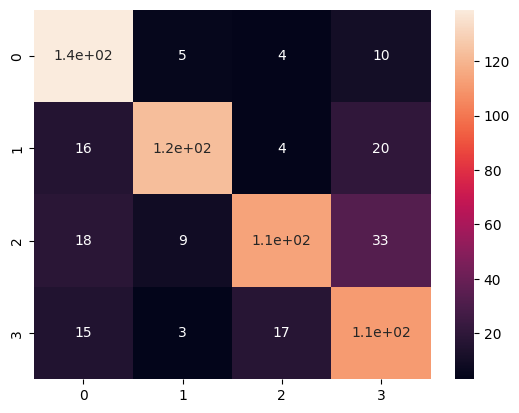

In [25]:
nb_matrix = confusion_matrix(y_valid, nb_pred)
sns.heatmap(nb_matrix, annot = True)

In [26]:
#logistic regression
lg_mod = LogisticRegression()
lg_mod.fit(X_train_df, y_train)
lg_pred = lg_mod.predict(X_valid_df)
print(classification_report(y_valid, lg_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       158
           1       0.83      0.80      0.81       163
           2       0.87      0.70      0.78       174
           3       0.66      0.75      0.70       146

    accuracy                           0.78       641
   macro avg       0.78      0.78      0.78       641
weighted avg       0.79      0.78      0.78       641



<Axes: >

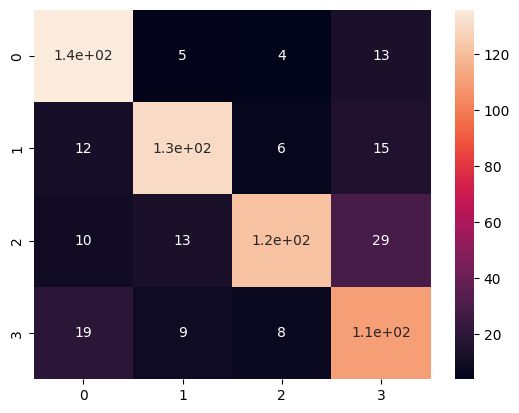

In [29]:
lg_matrix = confusion_matrix(y_valid, lg_pred)
sns.heatmap(lg_matrix, annot = True)

In [31]:
#random forest
rf_mod = RandomForestClassifier()
rf_mod.fit(X_train_df, y_train)
rf_pred = rf_mod.predict(X_valid_df)
print(classification_report(y_valid, rf_pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       158
           1       0.90      0.87      0.88       163
           2       0.95      0.78      0.85       174
           3       0.81      0.88      0.84       146

    accuracy                           0.86       641
   macro avg       0.87      0.86      0.86       641
weighted avg       0.87      0.86      0.86       641



In [32]:
#Decision Tree
dt_mod = DecisionTreeClassifier()
dt_mod.fit(X_train_df, y_train)
dt_pred =dt_mod.predict(X_valid_df)
print(classification_report(y_valid, dt_pred))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75       158
           1       0.77      0.74      0.75       163
           2       0.87      0.69      0.77       174
           3       0.71      0.67      0.69       146

    accuracy                           0.74       641
   macro avg       0.75      0.74      0.74       641
weighted avg       0.76      0.74      0.74       641



#Hyper Parameter Tuning

Between all the 4 models used, I've decided to tune  Random forest and logistic regression to see if modifying the parameters will help improve their scores.

For this, I've imported GridSearchCV and RandomizedSearchCV. I've included some parameters for it to check if changes in the paramater will increase accuracy and F1.

For LG, the predicted parameter is 100 iter and the best score is 78. Upon using this output to cross-check with the validation dataset, the accuracy along with recall and F1 remained the same.

For Random forest, the predicted score is 82% but upon test it was 85%. This is 1% less than the pre-tuned value. The F1 and recall seems too have eiher gone up or down in  some as well.


In [33]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [36]:
#Logistic Regression
#Random Forest
lg_param =  {
    'max_iter' : [100, 150, 200]
   }

lg_grid = GridSearchCV(LogisticRegression(), lg_param)
lg_tune = lg_grid.fit(X_train_df, y_train)

In [37]:
print(lg_tune.best_params_)
print(lg_tune.best_score_)

{'max_iter': 100}
0.7839249817251461


In [38]:
hp_lg = lg_tune.predict(X_valid_df)
print(classification_report(y_valid, hp_lg))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       158
           1       0.83      0.80      0.81       163
           2       0.87      0.70      0.78       174
           3       0.66      0.75      0.70       146

    accuracy                           0.78       641
   macro avg       0.78      0.78      0.78       641
weighted avg       0.79      0.78      0.78       641



In [52]:
#Random Forest
rf_param =  {
    'n_estimators' : [100, 300, 500]
   }

rf_grid = RandomizedSearchCV(RandomForestClassifier(), rf_param)
rf_tune = rf_grid.fit(X_train_df, y_train)

#/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [40]:
print(rf_tune.best_params_)
print(rf_tune.best_score_)

{'n_estimators': 500}
0.8260477582846004


In [41]:
hp_rf = rf_tune.predict(X_valid_df)
print(classification_report(y_valid, hp_rf))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       158
           1       0.91      0.87      0.89       163
           2       0.93      0.76      0.84       174
           3       0.81      0.86      0.83       146

    accuracy                           0.85       641
   macro avg       0.86      0.86      0.85       641
weighted avg       0.86      0.85      0.85       641



#Model Evaluation

Of the two tuned models, the better model between the them was Random Forest. So I used the pre-tuned parameters from this and tested it on the test set and got a score of 84%. This is much lower than the pretuned value and what was predicted after tuning. The F1 and recall are also a bit lower by 1 - 2 % but thats fine.


In [58]:
eval = rf_tune.predict(X_test_df)
print(classification_report(y_test, eval))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       193
           1       0.84      0.85      0.85       203
           2       0.94      0.74      0.83       193
           3       0.81      0.84      0.82       213

    accuracy                           0.84       802
   macro avg       0.85      0.84      0.84       802
weighted avg       0.84      0.84      0.84       802



#Conclusion
Overall the chosen model is alright but perhaps using a stronger model like svc and GBM might provide better scores.

*Recommendation:

1. To reach specific auidances, PeaCh and try using trageted hashtags suchs as #naturalskincareproducts #organic, etc under their post on X so that it can be recommended to interested users
2. X allows users to run ads on their platform. PeaCh can use this service so reach specific auidance and attach links that will take them to their websites
3. This will invole trial and error, but they create post for specific regions to see which one garners more responses and move from there.

#Reference List

1. Dennis, T. (2019) Confusion matrix visualization, Medium. Available at: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea (Accessed: April 15, 2024).

2. passionate-nlp (2021) “Twitter Sentiment Analysis.”

3. Yash_R Follow, Y. (2018) Python, GeeksforGeeks. Available at: https://www.geeksforgeeks.org/python-stemming-words-with-nltk/ (Accessed: April 15, 2024).

4. Yash_R Follow, Y. (2018) Python, GeeksforGeeks. Available at: https://www.geeksforgeeks.org/python-stemming-words-with-nltk/ (Accessed: April 15, 2024).